### Scenario 4: model comparison

In [1]:
from mira.sources.biomodels import get_template_model
from mira.metamodel import TemplateModelComparison, get_dkg_refinement_closure
import matplotlib.pyplot as plt 
refinement_fun = get_dkg_refinement_closure().is_ontological_child

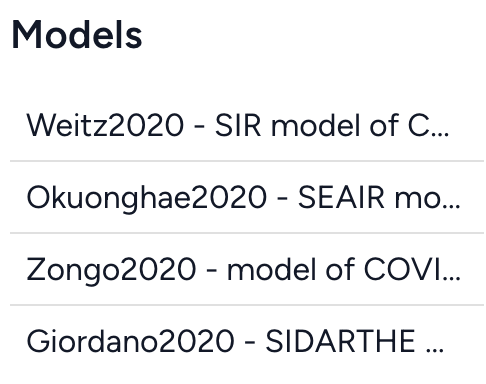

In [2]:
model_ids = ['BIOMD0000000955', 'BIOMD0000000991',
             'BIOMD0000000983', 'BIOMD0000000963']

In [3]:
models = {model_id: get_template_model(model_id)
          for model_id in model_ids}

In [4]:
tc = TemplateModelComparison(list(models.values()), refinement_fun)

In [5]:
with open('mira_comparison_scenario4.json', 'w') as fh:
    fh.write(tc.model_comparison.json(indent=1))

In [6]:
print(model_ids)
tc.model_comparison.get_similarity_scores()

['BIOMD0000000955', 'BIOMD0000000991', 'BIOMD0000000983', 'BIOMD0000000963']


[{'models': (0, 1), 'score': 0.0625},
 {'models': (0, 2), 'score': 0.375},
 {'models': (0, 3), 'score': 0.3125},
 {'models': (1, 2), 'score': 0.35714285714285715},
 {'models': (1, 3), 'score': 0.2857142857142857},
 {'models': (2, 3), 'score': 0.2857142857142857}]

In [8]:
simscores = tc.model_comparison.get_similarity_scores()

In [30]:
nodes = []
edges = []
added = set()
for entry in simscores:
    for model_id in entry['models']:
        if model_id not in added:
            nodes.append((model_id, {'label': model_ids[model_id]}))
            added.add(model_id)
    edges.append((*entry['models'], {'weight': entry['score']}))

In [31]:
nodes, edges

([(0, {'label': 'BIOMD0000000955'}),
  (1, {'label': 'BIOMD0000000991'}),
  (2, {'label': 'BIOMD0000000983'}),
  (3, {'label': 'BIOMD0000000963'})],
 [(0, 1, {'weight': 0.0625}),
  (0, 2, {'weight': 0.375}),
  (0, 3, {'weight': 0.3125}),
  (1, 2, {'weight': 0.35714285714285715}),
  (1, 3, {'weight': 0.2857142857142857}),
  (2, 3, {'weight': 0.2857142857142857})])

In [32]:
import networkx

In [33]:
G = networkx.DiGraph()
G.add_nodes_from(nodes)

In [34]:
G.add_edges_from(edges)

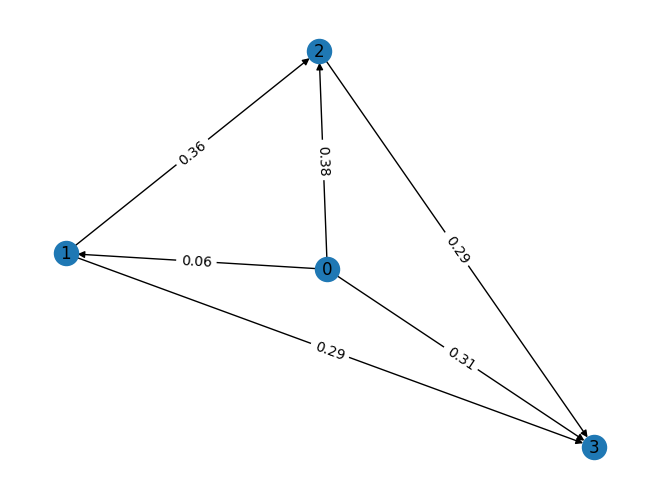

In [35]:
pos = networkx.spring_layout(G)
networkx.draw(G, pos, with_labels=True)
edge_labels = {(u, v): '%.2f' % d['weight'] for u, v, d in G.edges(data=True)}
networkx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)
plt.show()